In [ ]:
''' plot timeseries of TC intercepts by saildrones - colored/ marked by quadrants, distance to TC centers '''
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import sys

In [2]:
year = '2023'
path = '/Users/chi/Documents/projects/sd-ni-wp/SD_wp_TCs/data_SD_TC-intercept/'
fns_all = np.sort( os.listdir(path) )
fns = []
for fn in fns_all:
    if (year+'.txt' in fn) & ('interp' in fn):
        fns.append(fn)
print('TC track file names that will be look at:',fns)
''' read intercept file '''
TCnames = np.genfromtxt(path+fns[0], delimiter=' ', skip_header=2, usecols=(7,), dtype=str)
SDnums = np.genfromtxt(path+fns[0], delimiter=' ', skip_header=2, usecols=(0,), dtype=str)
data_in = np.genfromtxt(path+fns[0], delimiter=' ',skip_header=2, usecols=(1,2,3,4,5,6,8,9,10,11,12,13,14), dtype=float)
''' read TC track file '''
path_trk = '/Users/chi/Documents/projects/sd-ni-wp/SD_wp_TCs/data_TC-tracks/'
fn = 'timeseries_IBTrACS_NA_'+year+'.txt'
TCnames_all = np.genfromtxt(path_trk+fn,delimiter=' ',skip_header=2, usecols=(0,), dtype=str)
TCtracks = np.genfromtxt(path_trk+fn,delimiter=' ',skip_header=2, usecols=(1,2,3,4), dtype=float)
print('check out TCtracks',TCtracks[0])
dtime_TCtracks = np.array([datetime.datetime.fromtimestamp(item) for item in TCtracks[:,0]])

TC track file names that will be look at: ['SD_intercept_TCs_tracks(interp)_NA_2023.txt']
check out TCtracks [ 1.6737696e+09 -7.1300000e+01  3.6400000e+01 -4.0000000e+00]


In [3]:
''' get all the "NAMED" TC names from IBTrACS in NA '''
TCnames_all_uniq = np.unique( TCnames_all )
TCnames_all_uniq = sorted( list(set(TCnames_all_uniq)) )
TCnames_all_uniq.remove('UNNAMED')
print(TCnames_all_uniq)
TCnames_uniq = sorted( list(set(np.unique( TCnames ))) )
TCnames_uniq.remove('UNNAMED')
print('TCs with intercepts:',TCnames_uniq)

['ARLENE', 'BRET', 'CINDY', 'DON', 'EMILY', 'FRANKLIN', 'GERT', 'HAROLD', 'IDALIA', 'JOSE', 'KATIA', 'LEE', 'MARGOT', 'NIGEL', 'OPHELIA', 'PHILIPPE', 'RINA', 'SEAN', 'TAMMY']
TCs with intercepts: ['FRANKLIN', 'GERT', 'HAROLD', 'IDALIA', 'LEE', 'OPHELIA', 'PHILIPPE', 'RINA', 'SEAN', 'TAMMY']


FRANKLIN 1031
[ 1.69252278e+09 -6.67296448e+01  1.54633264e+01 -8.09000000e+00
 -5.94000000e+00  4.99921320e+02  1.69252278e+09 -6.26911111e+01
  1.32477778e+01 -3.00000000e+00  1.60000000e+01  2.85000000e+02
  1.00000000e+00]
[[0.12156863 0.46666667 0.70588235 1.        ]
 [1.         0.49803922 0.05490196 1.        ]
 [0.17254902 0.62745098 0.17254902 1.        ]
 [0.58039216 0.40392157 0.74117647 1.        ]]


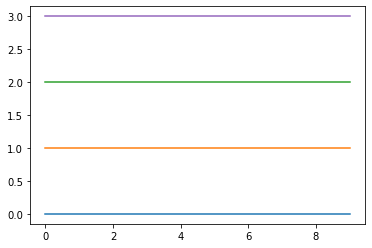

In [4]:
print(TCnames[0],SDnums[0])
print(data_in[0])
''' experiment & pick the colors for quadrants '''
cmap = matplotlib.colormaps['tab10']
cols = cmap(np.linspace(0,0.4,4))
print(cols)
for i in range( len(cols) ):
    plt.plot(i*np.ones((10,)),color=cols[i])

['1031' '1036' '1040' '1057' '1064' '1065' '1068'] intercepts FRANKLIN
['1040' '1069'] intercepts GERT
['1083'] intercepts HAROLD
['1045' '1057' '1065' '1083'] intercepts IDALIA
['1036' '1041' '1057' '1064' '1065' '1069'] intercepts LEE
['1045' '1057'] intercepts OPHELIA
['1031' '1036' '1041' '1068' '1069'] intercepts PHILIPPE
['1069'] intercepts RINA
['1069'] intercepts SEAN
['1031' '1036' '1040' '1041' '1068' '1069'] intercepts TAMMY


<Figure size 432x288 with 0 Axes>

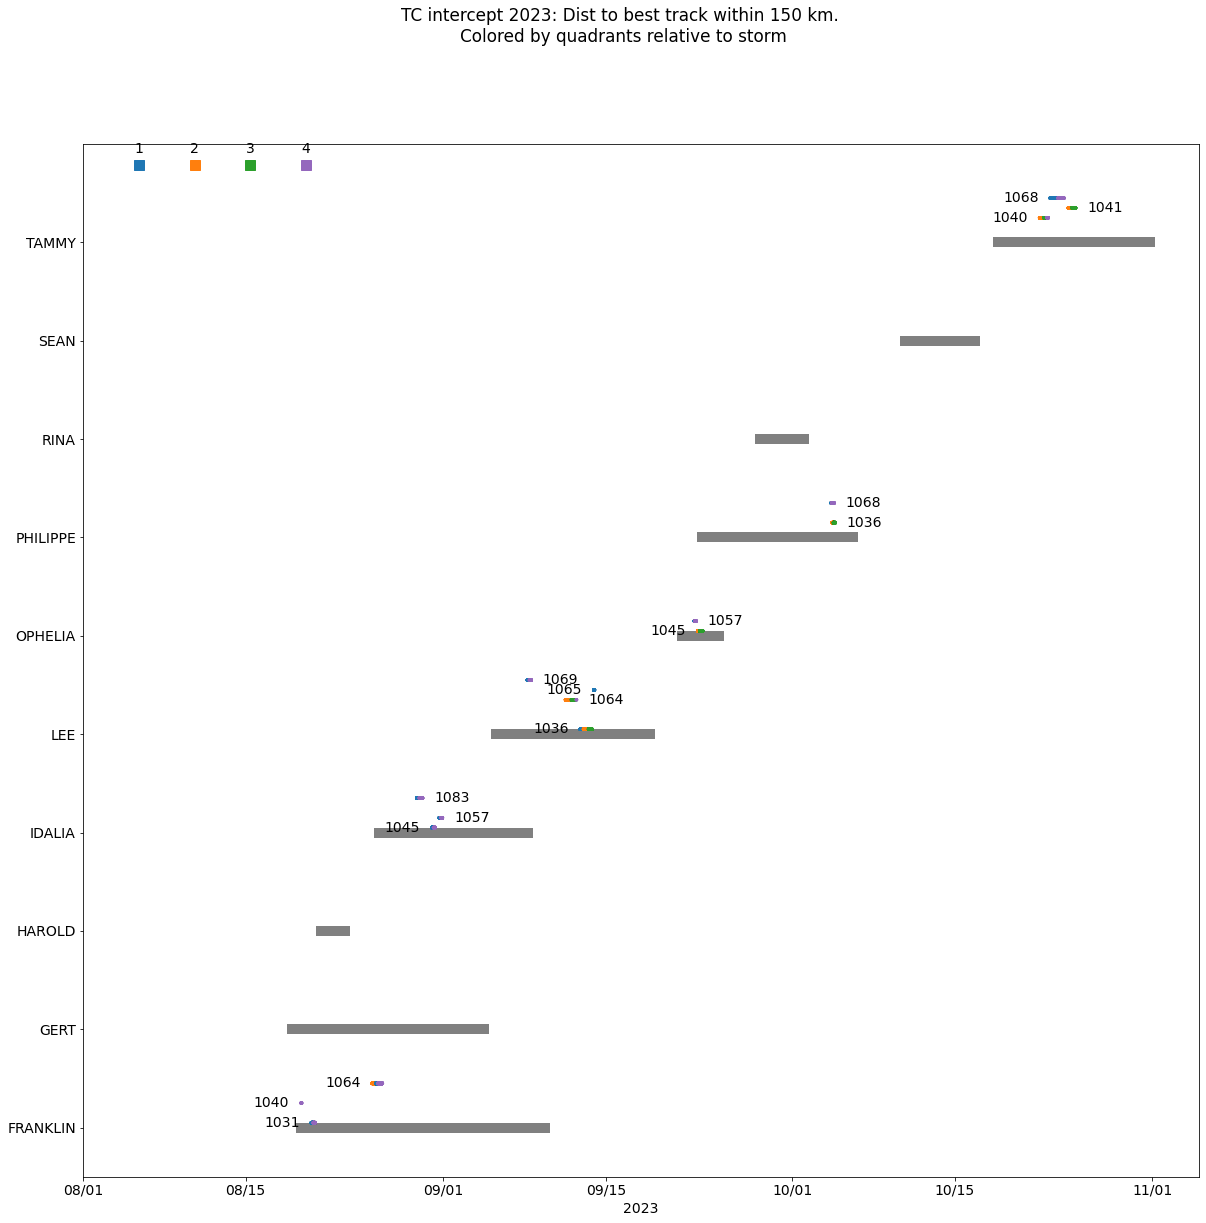

In [10]:
''' settings '''
dist2bt_max = 150 # km
''' plot time series '''
plt.clf()
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(1)
fig.set_size_inches(20, len(TCnames_all_uniq)*1)

for i, TCnm in enumerate( TCnames_uniq ):
    irow_TC = np.where( TCnames == TCnm )[0]
    SDs_this_TC = np.unique( SDnums[irow_TC] )
    print(SDs_this_TC,'intercepts',TCnm)
    ''' plot one TC at a time '''
    irow_TCtracks = np.where( TCnames_all == TCnm )[0]
    plt.plot(dtime_TCtracks[irow_TCtracks], i*np.ones(irow_TCtracks.shape),'-',color='gray',lw=10, zorder=1)
    ''' plot intercepts with conditions '''
    dtime_TC = np.array([datetime.datetime.fromtimestamp(item) for item in data_in[irow_TC,6]])
    for j, SD in enumerate( SDs_this_TC ):
        iSD = np.where( (SDnums[irow_TC]== SD) & (data_in[irow_TC,5]< dist2bt_max) )[0]
        if len(iSD)> 0:
            # print(SD,len(iSD))
            cols_quad = np.array([cols[int(k-1)] for k in data_in[irow_TC[iSD],-1]])
            sc = plt.scatter(dtime_TC[iSD], (i+0.1*(j+0.5))*np.ones(iSD.shape),s=6,c=cols_quad, zorder=2)
            if j%2 == 0:
                plt.text(dtime_TC[iSD][0]-datetime.timedelta(days=1),i+0.1*(j+0.5), SD, ha='right',va='center')
            else:
                plt.text(dtime_TC[iSD][-1]+datetime.timedelta(days=1),i+0.1*(j+0.5), SD, ha='left',va='center')
        # break
''' figure settings '''
plt.gca().set_yticks(np.arange(0,len(TCnames_uniq)))
plt.gca().set_yticklabels(TCnames_uniq)
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m/%d'))
plt.xlabel(year)
if year == '2023':
    plt.xlim([datetime.datetime(int(year),8,1),datetime.datetime(int(year),11,5)])
elif year == '2022':
    plt.xlim([datetime.datetime(int(year),8,15),datetime.datetime(int(year),11,20)])
plt.ylim([-0.5,len(TCnames_uniq)])
''' color icons - quadrants '''
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
for i in range(len(cols)):
    plt.plot(xlim[0]+(0.05+i*0.05)*np.diff(xlim), ylim[0]+0.98*np.diff(ylim), 's',color=cols[i], ms=10)
    plt.text(xlim[0]+(0.05+i*0.05)*np.diff(xlim), ylim[0]+0.995*np.diff(ylim), str(i+1),ha='center',va='center')
''' save figure '''
plt.suptitle('TC intercept '+year+': Dist to best track within {:.0f} km. \nColored by quadrants relative to storm'.format(dist2bt_max))
fig.savefig('timeseries_TC-intercepts(lt{:.0f}km)_SD-by-quadrants_'.format(dist2bt_max)+year+'.png',dpi=400,bbox_inches='tight')